In [1]:
from preprocess import *
import pandas as pd
from connection import *

In [2]:
con = getConnection()
# sorry for this, we need to set schema this way
df = pd.read_sql_query("""
	set search_path to mimiciii;
	SELECT COUNT(*) FROM patients;
	""", con=con)

In [3]:
stays = getICUStayPatients()

In [4]:
stays.head()

,hadm_id,icustay_id,gender,dob,intime,outtime,dod,los,age
0,110404,280836,0,2132-02-21 00:00:00,2198-02-14 23:27:38,2198-02-18 05:26:11,2198-02-18 00:00:00,3.2490,65
1,129886,219649,1,2088-08-07 00:00:00,2170-10-07 11:28:53,2170-10-14 14:38:07,2170-10-19 00:00:00,7.1314,82
2,192224,204407,1,2090-02-27 00:00:00,2164-06-14 21:18:27,2164-06-18 22:53:12,2164-06-27 00:00:00,4.0658,74
3,109185,231490,1,2090-09-05 00:00:00,2166-08-12 22:03:26,2166-09-12 14:41:42,2166-12-09 00:00:00,30.6932,75
4,165312,238023,1,2107-05-16 00:00:00,2152-09-21 22:48:50,2152-10-20 15:19:31,NaN,28.6880,45


In [5]:
ts = getICUStayTimeSeries(stays.iloc[38])

In [6]:
ts

,Time,icustay_id,age,gender,Respiratory Rate,SpO2,Temperature,Heart Rate,CVP,Hematocrit,...,Creatinine,Chloride,Urea Nitrogen,Platelet Count,White Blood Cells,Red Blood Cells,Calculated Total CO2,pH,NeedInvasive Ventilation,NeedNon-invasive Ventilation
0,2179-02-16 11:00:00,268261,50,0,17.75,98.0,None,92.250000,20.000000,24.6,...,0.7,112.0,14.0,73.0,15.6,2.61,28.0,7.440,0,0
1,2179-02-16 12:00:00,268261,50,0,17.75,98.0,None,92.250000,20.000000,24.6,...,0.7,112.0,14.0,73.0,15.6,2.61,26.0,7.430,0,0
2,2179-02-16 13:00:00,268261,50,0,17.75,98.0,None,92.250000,20.000000,24.6,...,0.7,112.0,14.0,73.0,15.6,2.61,25.0,7.380,0,0
3,2179-02-16 14:00:00,268261,50,0,17.75,98.0,None,92.250000,20.000000,24.6,...,0.7,112.0,14.0,86.0,15.6,2.61,26.0,7.410,0,0
4,2179-02-16 15:00:00,268261,50,0,17.75,98.0,None,92.250000,20.000000,31.0,...,0.7,112.0,14.0,86.0,11.9,3.48,27.5,7.375,0,0
5,2179-02-16 16:00:00,268261,50,0,18.00,100.0,None,99.250000,23.500000,31.0,...,0.7,112.0,14.0,86.0,11.9,3.48,27.5,7.375,0,0
6,2179-02-16 17:00:00,268261,50,0,16.00,100.0,None,101.333333,21.333333,31.0,...,0.7,112.0,14.0,86.0,11.9,3.48,27.5,7.375,0,0
7,2179-02-16 18:00:00,268261,50,0,24.00,99.0,None,122.000000,20.000000,31.0,...,0.7,112.0,14.0,86.0,11.9,3.48,24.0,7.350,0,0
8,2179-02-16 19:00:00,268261,50,0,21.00,100.0,None,95.000000,21.000000,31.0,...,0.7,112.0,14.0,86.0,11.9,3.48,24.0,7.350,0,0
9,2179-02-16 20:00:00,268261,50,0,26.00,98.0,None,108.000000,17.000000,31.0,...,0.7,112.0,14.0,86.0,11.9,3.48,24.0,7.310,0,0


In [7]:
ventilations = pd.read_sql('SELECT DISTINCT icustay_id FROM procedureevents_mv WHERE icustay_id IS NOT NULL AND (itemid=225792 OR itemid=225794)',con=con)

In [8]:
stays_with_ventilation = stays[stays['icustay_id'].isin(ventilations['icustay_id'])]

In [9]:
len(stays_with_ventilation), len(stays)

(1690, 9785)

In [10]:
stays_with_ventilation

,hadm_id,icustay_id,gender,dob,intime,outtime,dod,los,age
37,138376,256064,1,2090-11-19 00:00:00,2166-01-09 13:05:18,2166-02-01 10:52:09,2166-02-01 00:00:00,22.9075,75
169,135614,224934,1,2055-03-04 00:00:00,2111-12-18 15:27:20,2111-12-22 22:20:38,NaN,4.2870,56
215,116367,209737,1,2093-04-27 00:00:00,2143-10-23 21:06:05,2143-11-04 19:51:06,2143-11-04 00:00:00,11.9479,50
245,158767,270525,1,2100-03-06 00:00:00,2185-03-22 09:48:35,2185-05-04 20:45:04,2185-05-26 00:00:00,43.4559,85
445,177047,236241,0,2072-09-06 00:00:00,2129-01-15 17:46:37,2129-01-21 15:35:15,2132-01-11 00:00:00,5.9088,56
471,172739,253288,1,2061-04-08 00:00:00,2137-10-07 10:45:31,2137-11-11 16:58:01,NaN,35.2587,76
472,138877,256557,1,2061-04-08 00:00:00,2137-11-15 14:27:15,2137-11-25 16:32:27,NaN,10.0869,76
473,146557,276865,1,2061-04-08 00:00:00,2137-12-03 06:29:10,2137-12-14 16:42:22,NaN,11.4258,76
513,114726,207975,1,2097-09-24 00:00:00,2159-10-22 09:17:58,2159-10-29 19:59:33,2159-10-29 00:00:00,7.4455,62
527,127294,207018,0,2063-08-10 00:00:00,2118-01-02 20:47:21,2118-01-25 14:56:55,NaN,22.7566,54


In [11]:
all_time_series = getAllPatientsTimeSeries(stays)

In [12]:
time_series = all_time_series[38]

In [15]:
import matplotlib.pyplot as plt
from plottimeseries import *

In [14]:
%matplotlib notebook

/Users/maxpoon/projects/Evidence-Based-Lab-Test-Critical-Value-Discovery-for-ICU-Patients/codes/plottimeseries.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  time_series['Time'] = pd.to_datetime(time_series['Time'])


<IPython.core.display.Javascript object>


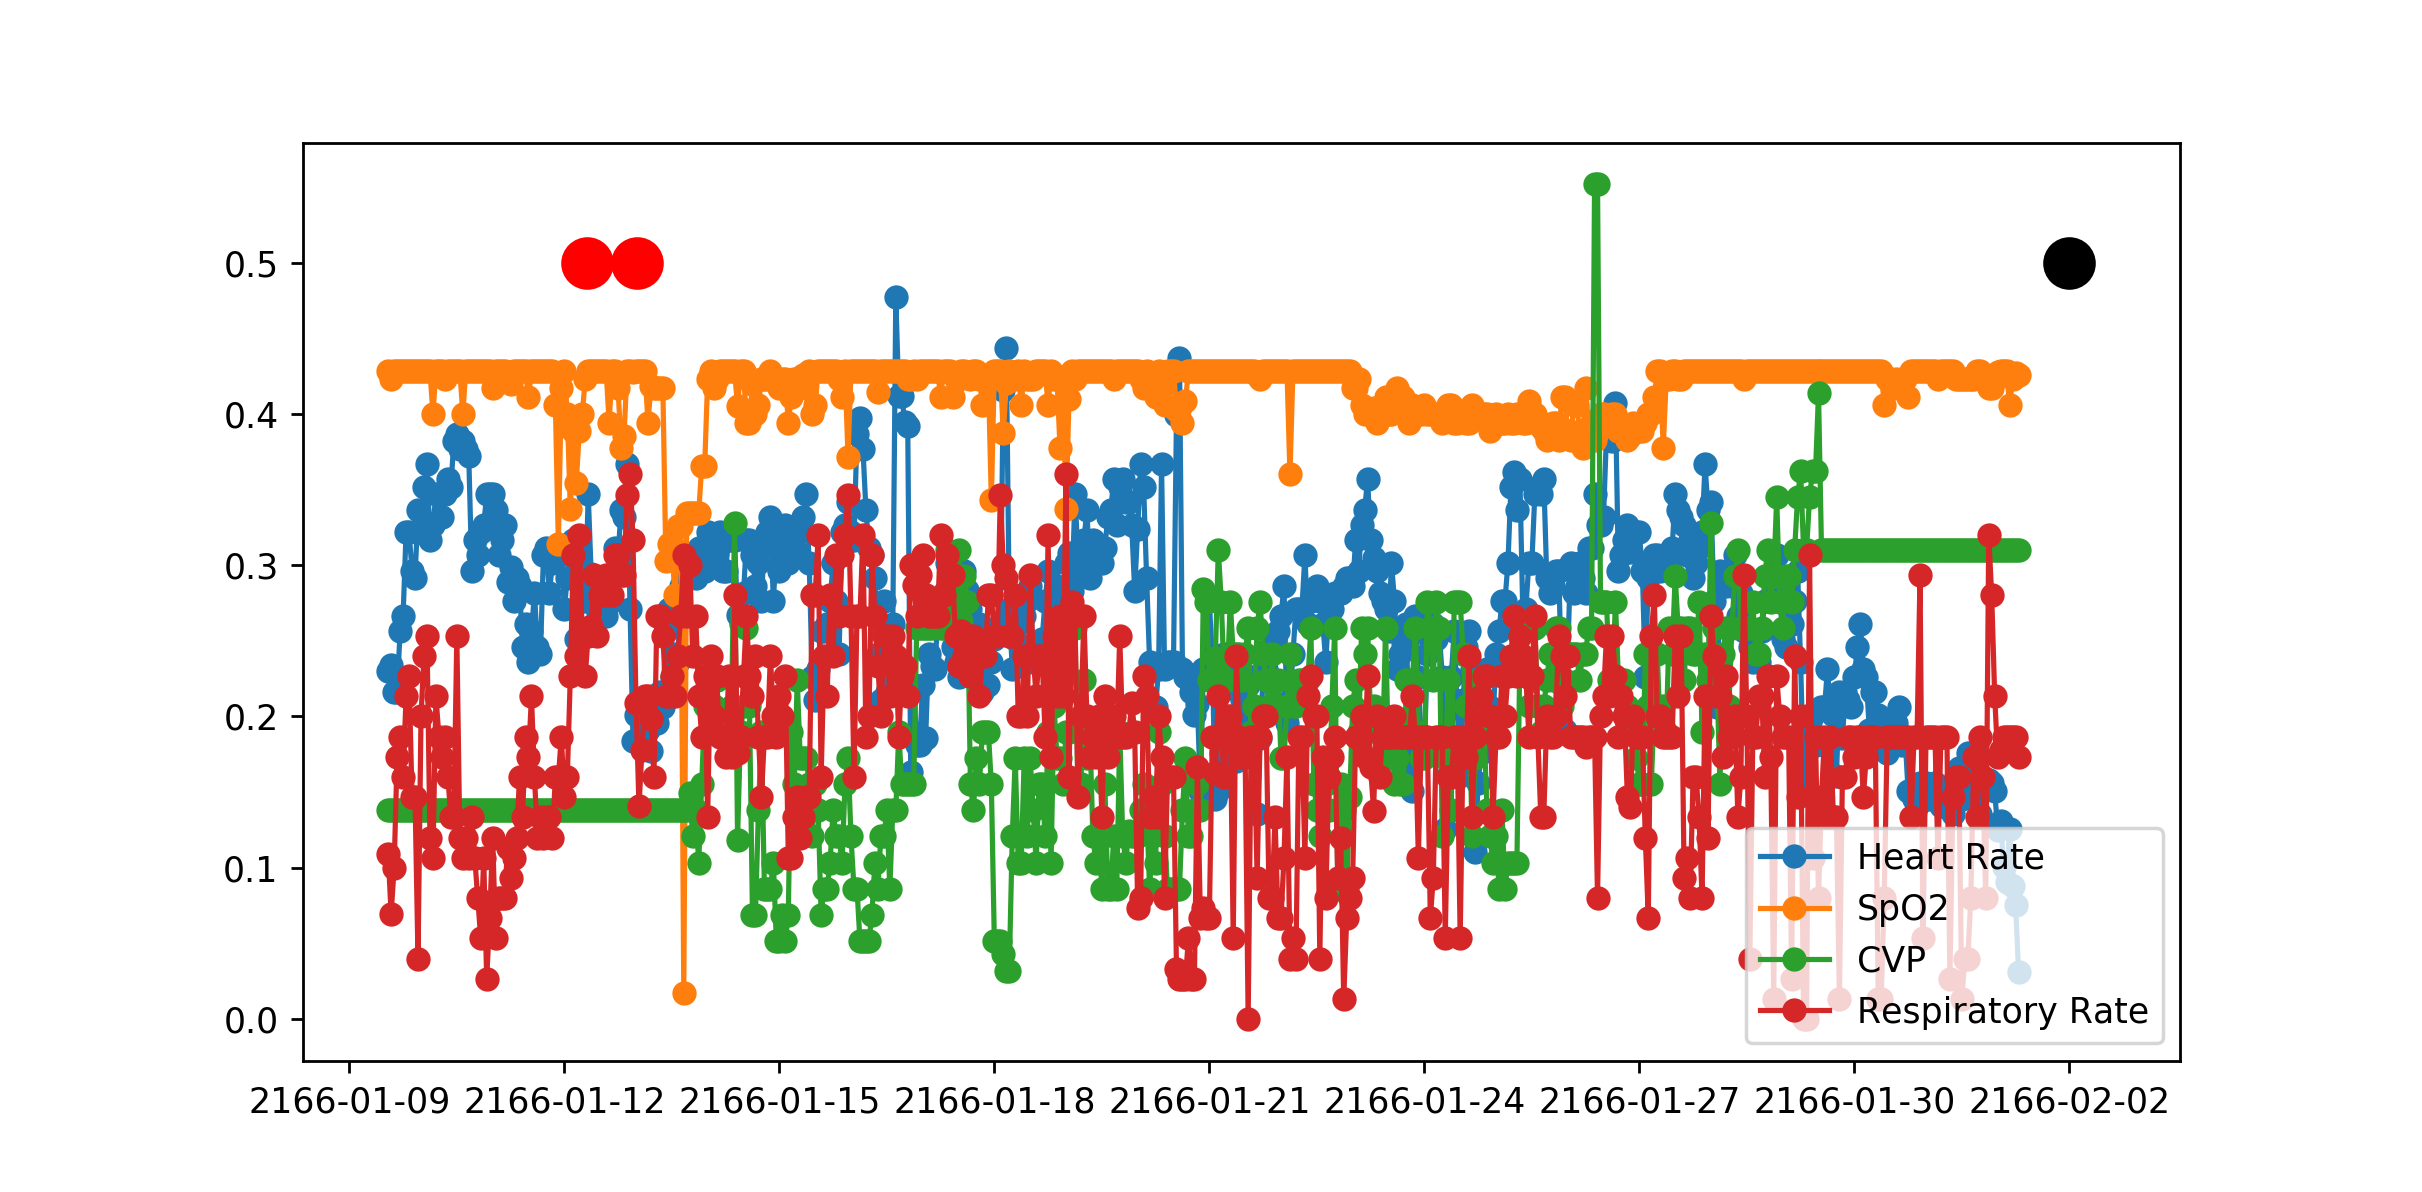

In [18]:
plottimeseries(['Heart Rate', 'SpO2', 'CVP', 'Respiratory Rate'], stays.iloc[37])

/Users/maxpoon/projects/Evidence-Based-Lab-Test-Critical-Value-Discovery-for-ICU-Patients/codes/plottimeseries.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  time_series['Time'] = pd.to_datetime(time_series['Time'])


<IPython.core.display.Javascript object>


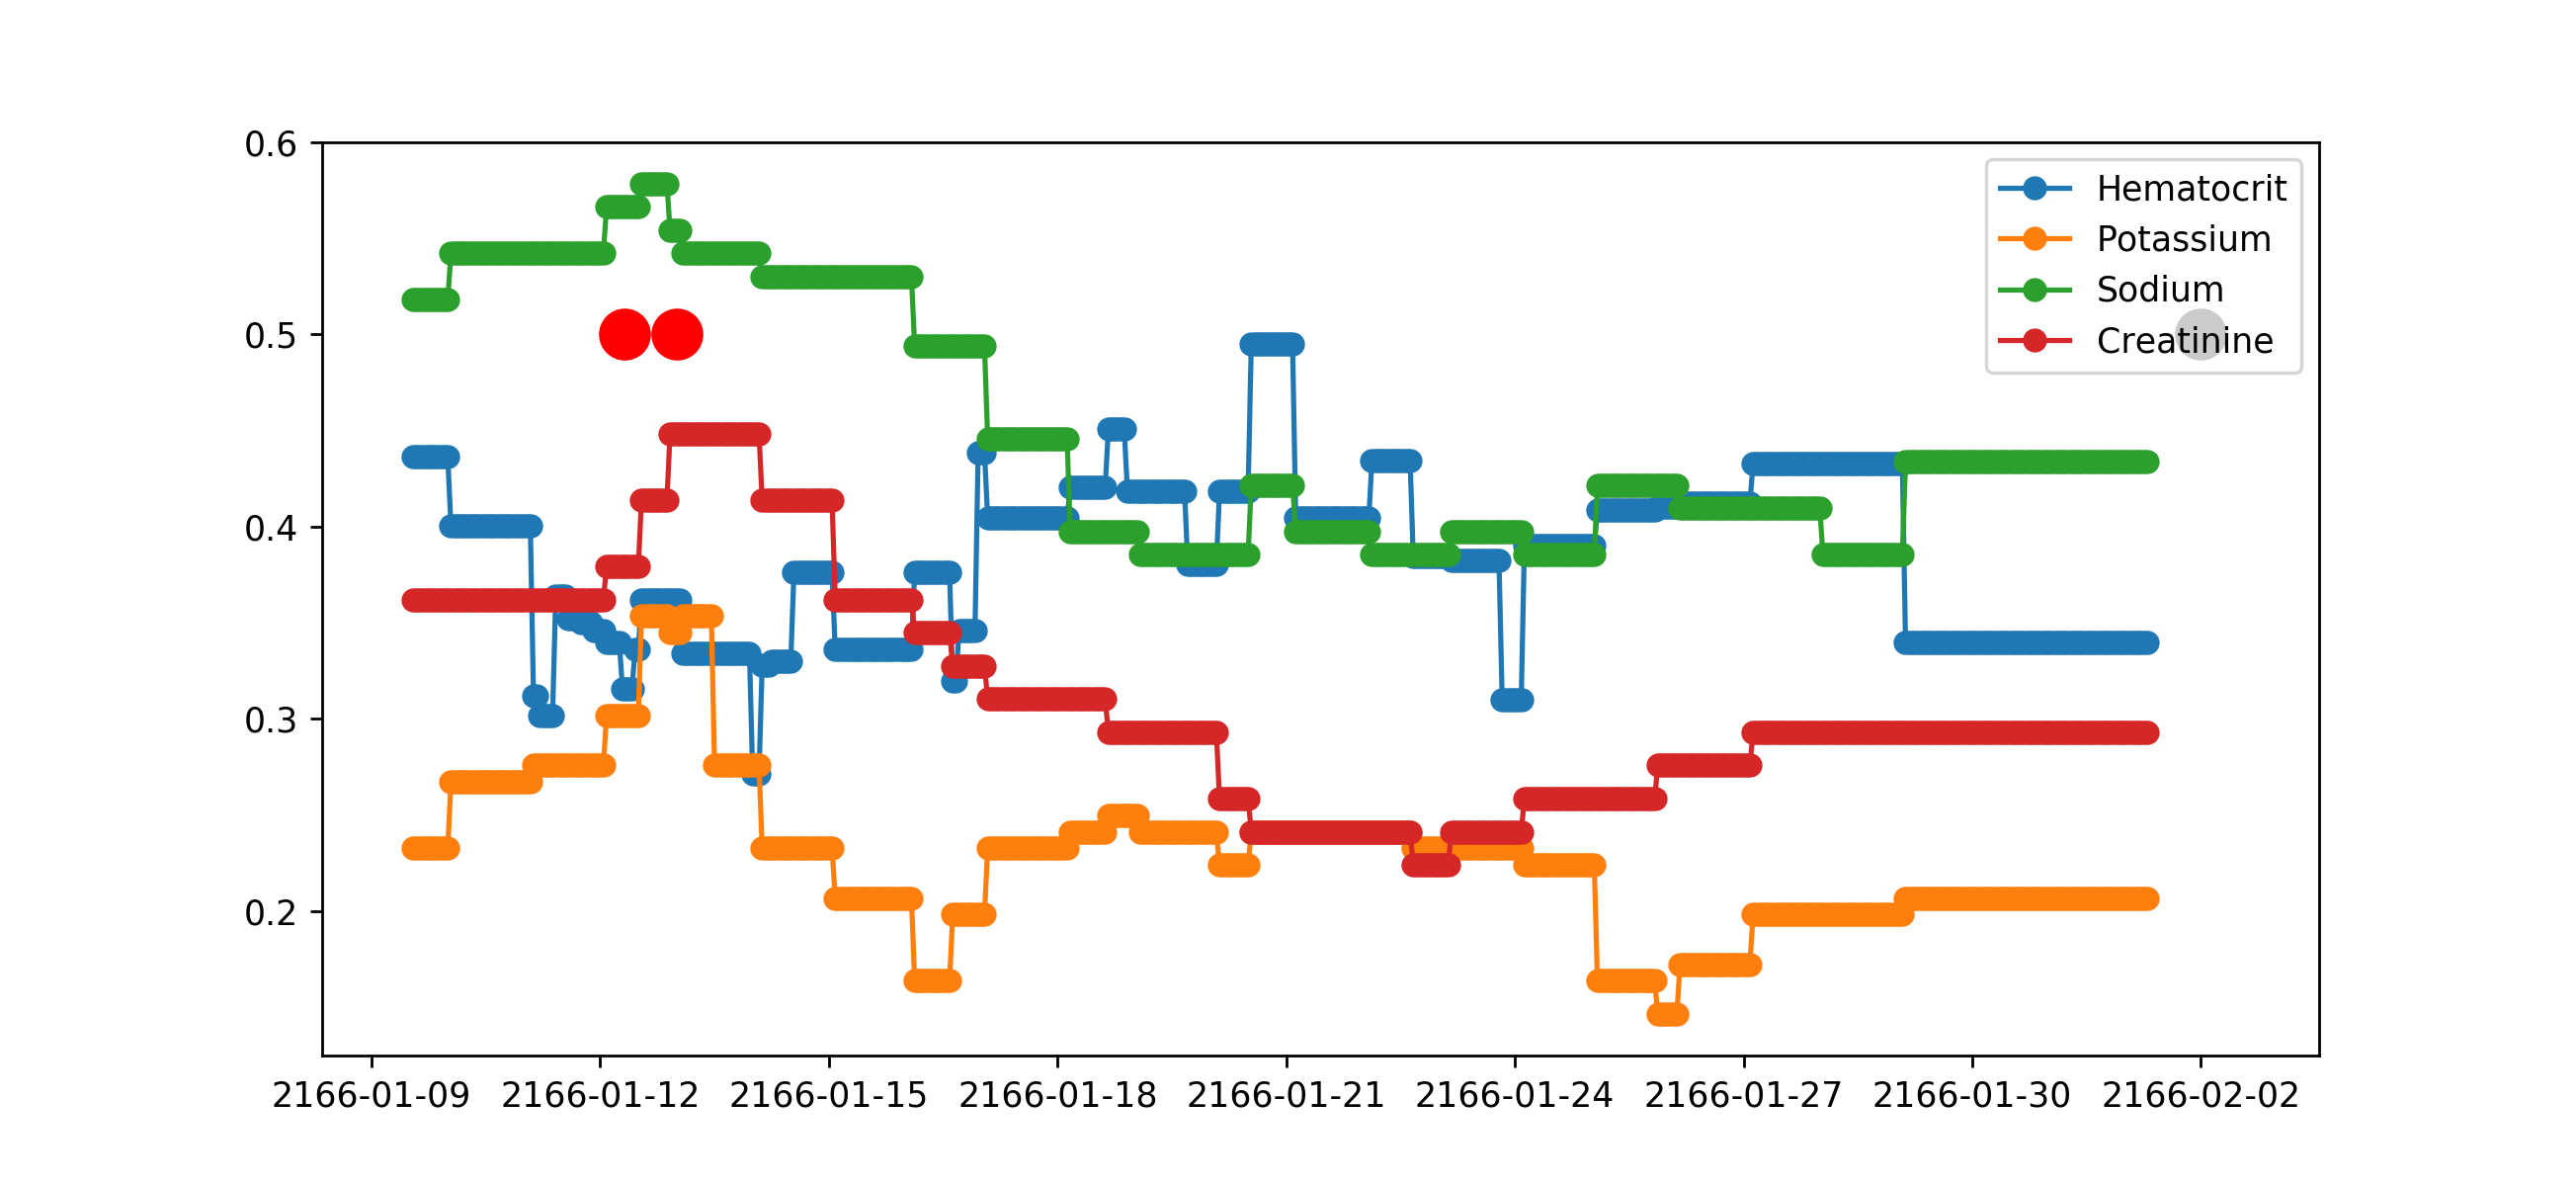

In [19]:
plottimeseries(['Hematocrit', 'Potassium', 'Sodium', 'Creatinine'], stays.iloc[37])